# First Model

#### First try including sk-learn model and EDA

## Load packages

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## import dataset

In [2]:
df = pd.read_csv("car_prices.csv", on_bad_lines="skip")

In [3]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [4]:
print(f"We have {len(df.index):,} observations and {len(df.columns)} columns in our dataset.")

We have 558,811 observations and 16 columns in our dataset.


In [5]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [6]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


# Nicht benötigte Spalten entfernen

* trim
* vin
* mmr

In [8]:
df = df.drop(["trim", "vin", "mmr"], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   body          545616 non-null  object 
 4   transmission  493458 non-null  object 
 5   state         558811 non-null  object 
 6   condition     547017 non-null  float64
 7   odometer      558717 non-null  float64
 8   color         558062 non-null  object 
 9   interior      558062 non-null  object 
 10  seller        558811 non-null  object 
 11  sellingprice  558811 non-null  int64  
 12  saledate      558811 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 55.4+ MB


## Rename Columns

In [10]:
df = df.rename(columns={
"make" : "brand",
"body" : "type",
"transmission" : "drivetrain",
"odometer" : "miles"} 
    )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   brand         548510 non-null  object 
 2   model         548412 non-null  object 
 3   type          545616 non-null  object 
 4   drivetrain    493458 non-null  object 
 5   state         558811 non-null  object 
 6   condition     547017 non-null  float64
 7   miles         558717 non-null  float64
 8   color         558062 non-null  object 
 9   interior      558062 non-null  object 
 10  seller        558811 non-null  object 
 11  sellingprice  558811 non-null  int64  
 12  saledate      558811 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 55.4+ MB


In [12]:
df.dtypes

year              int64
brand            object
model            object
type             object
drivetrain       object
state            object
condition       float64
miles           float64
color            object
interior         object
seller           object
sellingprice      int64
saledate         object
dtype: object

# Fehlende Werte löschen

In [13]:
# Fehlende Werte ermitteln
df.isna().sum()

year                0
brand           10301
model           10399
type            13195
drivetrain      65353
state               0
condition       11794
miles              94
color             749
interior          749
seller              0
sellingprice        0
saledate            0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

year            0
brand           0
model           0
type            0
drivetrain      0
state           0
condition       0
miles           0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64

# Alles in lowercase umwandeln

In [16]:
df["brand"].value_counts()

Ford             81014
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27183
Honda            24781
Hyundai          18663
BMW              17509
Kia              15830
Chrysler         15135
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston Marti

In [17]:
df["brand"] = df["brand"].str.lower()
df["model"] = df["model"].str.lower()
df["type"] = df["type"].str.lower()


In [18]:
df["brand"].head()

0      kia
1      kia
2      bmw
3    volvo
4      bmw
Name: brand, dtype: object

# Kategorial oder Numerisch?

* year = categorial
* brand = categorial
* model = categorial
* type = categorial
* drivetrain = categorial
* state = categorial
* condition = categorial
* miles = numeric
* color = categorial
* interior = categorial
* seller = categorial
* ratingprice = numeric
* sellingprice = numeric
* saledate = categorial

In [19]:
# In kategorische Variablen umwandeln:

for cat in ["year", "brand", "model", "type", "drivetrain", "state", "condition", "color", "interior", "seller", "saledate"]:
    df[cat] = df[cat].astype("category")

In [20]:
df.dtypes

year            category
brand           category
model           category
type            category
drivetrain      category
state           category
condition       category
miles            float64
color           category
interior        category
seller          category
sellingprice       int64
saledate        category
dtype: object

In [21]:
df.describe(include="category").T

,count,unique,top,freq
year,472336,26,2013,87474
brand,472336,53,ford,81014
model,472336,764,altima,16346
type,472336,45,sedan,211308
drivetrain,472336,2,automatic,455974
state,472336,34,fl,75243
condition,472336.0,41.0,1.9,36652.0
color,472336,20,black,93245
interior,472336,17,black,209870
seller,472336,11927,"ford motor credit company,llc",17756


In [22]:
df.describe()

,miles,sellingprice
count,472336.000000,472336.000000
mean,66701.070003,13690.403670
std,51939.183430,9612.962279
min,1.000000,1.000000
25%,28137.000000,7200.000000
50%,51084.000000,12200.000000
75%,96589.000000,18200.000000
max,999999.000000,230000.000000


# Variable lists

Furthermore, we prepare our data for the following processes of data splitting and building of data pipelines.

In [23]:
# list of all numerical data
list_num = df.select_dtypes(include=[np.number]).columns.tolist()

# list of all categorical data
list_cat = df.select_dtypes(include=['category']).columns.tolist()

print(list_num, list_cat)


['miles', 'sellingprice'] ['year', 'brand', 'model', 'type', 'drivetrain', 'state', 'condition', 'color', 'interior', 'seller', 'saledate']


In [24]:
# define outcome variable as y_label
y_label = 'sellingprice'

# select features
features = df.drop(columns=[y_label]).columns.tolist()

# create feature data for data splitting
X = df[features]

# list of numeric features
feat_num = X.select_dtypes(include=[np.number]).columns.tolist()

# list of categorical features
feat_cat = X.select_dtypes(include=['category']).columns.tolist() 

# create response for data splitting
y = df[y_label]

In [25]:
print(feat_num)

['miles']


# Train and test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data exploration set

We make a copy of the training data since we don’t want to alter our data during data exploration. We will use this data for our exploratory data analysis.

In [27]:
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

# Analyze data 
## Categorical data

In [28]:
df_train.describe(include="category").T 

,count,unique,top,freq
year,377868,26,2012,69957
brand,377868,53,ford,64731
model,377868,754,altima,13048
type,377868,44,sedan,168956
drivetrain,377868,2,automatic,364819
state,377868,34,fl,60273
condition,377868.0,41.0,1.9,29476.0
color,377868,20,black,74688
interior,377868,17,black,167865
seller,377868,11070,"ford motor credit company,llc",14152


In [29]:
for i in list_cat:
    print(i, "\n", df_train[i].value_counts())

year 
 2012    69957
2013    69718
2014    55689
2011    33096
2008    21642
2007    20355
2010    18143
2006    17315
2009    14412
2005    13765
2004    10921
2003     8309
2015     6433
2002     6140
2001     4119
2000     2740
1999     1783
1998     1180
1997      825
1996      449
1995      392
1994      229
1993      106
1992       82
1991       43
1990       25
Name: year, dtype: int64
brand 
 ford             64731
chevrolet        43371
nissan           35258
toyota           28151
dodge            21684
honda            19839
hyundai          14898
bmw              14090
kia              12707
chrysler         12082
infiniti         11248
mercedes-benz    11162
jeep             10169
volkswagen        8648
lexus             8339
gmc               7374
mazda             5514
cadillac          5070
lincoln           3916
audi              3828
acura             3616
buick             3585
subaru            3519
pontiac           3272
ram               3236
mitsubishi        292

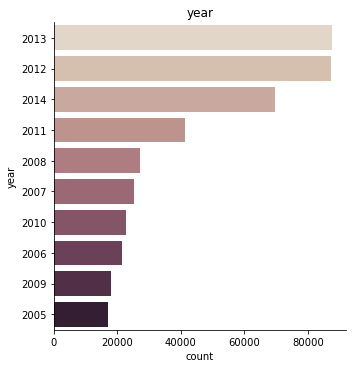

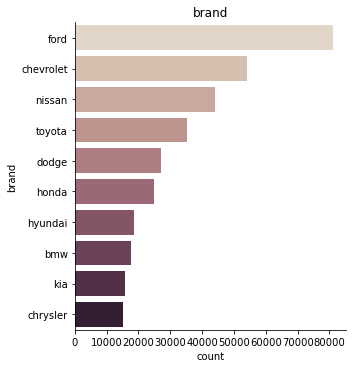

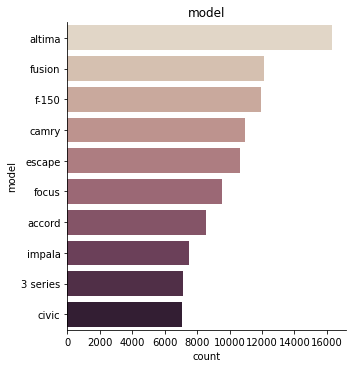

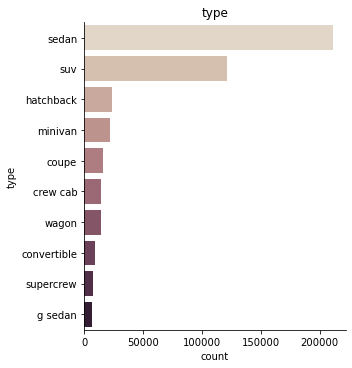

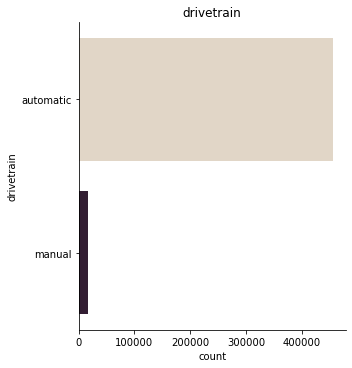

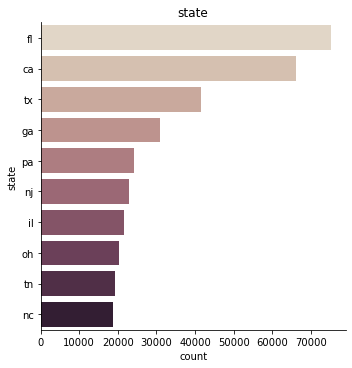

/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


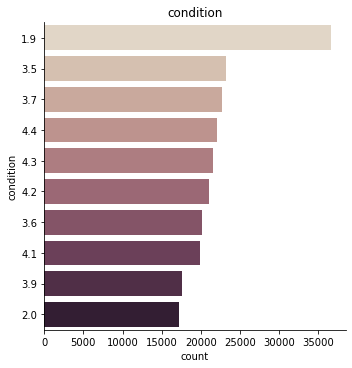

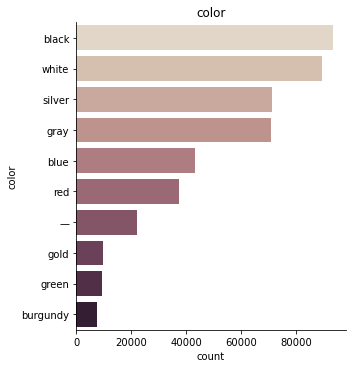

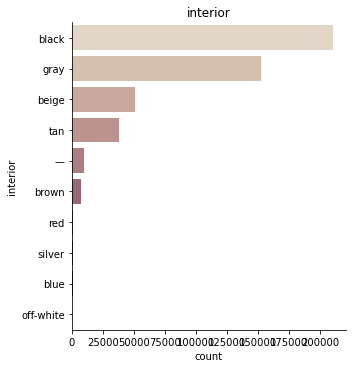

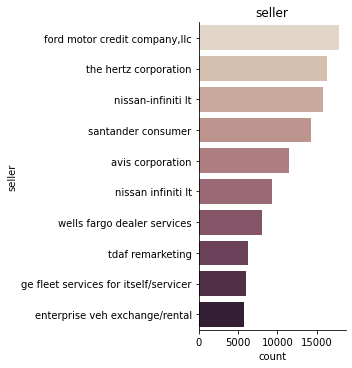

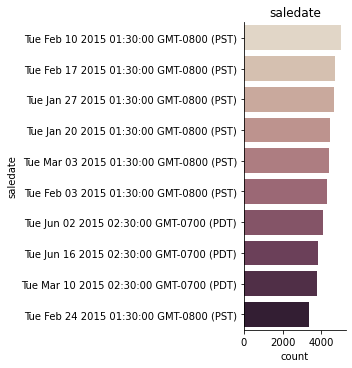

In [30]:
for i in list_cat:

    TOP_10 = df[i].value_counts().iloc[:10].index

    g = sns.catplot(y=i, 
            kind="count", 
            palette="ch:.25", 
            data=df,
            order = TOP_10)    
    
    plt.title(i)
    plt.show();

In [31]:
# Numercial gruped by categorical
# median
for i in list_cat:
    print(df_train.groupby(i).median().round(2).T)

year              1990      1991      1992      1993      1994      1995  \
miles         129102.0  166788.0  156969.5  171030.0  160518.0  170083.0   
sellingprice     425.0     400.0     450.0     600.0     500.0     550.0   

year              1996      1997      1998      1999  ...      2006      2007  \
miles         166638.0  162319.0  163262.0  158782.0  ...  114514.0  107222.0   
sellingprice     650.0     800.0     950.0    1050.0  ...    5100.0    6700.0   

year             2008     2009     2010     2011     2012     2013     2014  \
miles         97236.0  88692.0  76820.0  53122.5  37700.0  35046.0  19529.0   
sellingprice   8100.0   8700.0  10400.0  14600.0  14100.0  14500.0  17400.0   

year             2015  
miles         11551.0  
sellingprice  21800.0  

[2 rows x 26 columns]
brand           acura  aston martin     audi  bentley      bmw    buick  \
miles         85377.0       22068.5  58195.0  34760.0  50345.5  74334.0   
sellingprice  12500.0       52250.0  18500.0

seller        1 cochran of monroeville  101motors  143 auto sales inc  \
miles                         106396.0    98491.0             93990.0   
sellingprice                    4200.0     3750.0              4000.0   

seller        159191 canada inc  1st advantage fcu  1st capital finance  \
miles                   56534.0            92626.0             200903.0   
sellingprice            19100.0             8200.0                400.0   

seller        1st choice automotive corp  1st choice credit union  \
miles                           103250.5                  99599.0   
sellingprice                      7750.0                  10000.0   

seller        1st choice money center  1st class auto  ...  \
miles                         78577.0        103321.0  ...   
sellingprice                    450.0          3300.0  ...   

seller        zimbrick volkswagen of madison  zimmerman auto brokers inc  \
miles                                62834.5                     55177.0   
selling

## Numerical data

In [32]:
# summary of numerical attributes
df_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
miles,377868.0,66715.77,51970.53,1.0,28151.0,51102.0,96611.0,999999.0
sellingprice,377868.0,13691.10,9608.59,1.0,7200.0,12200.0,18200.0,183000.0


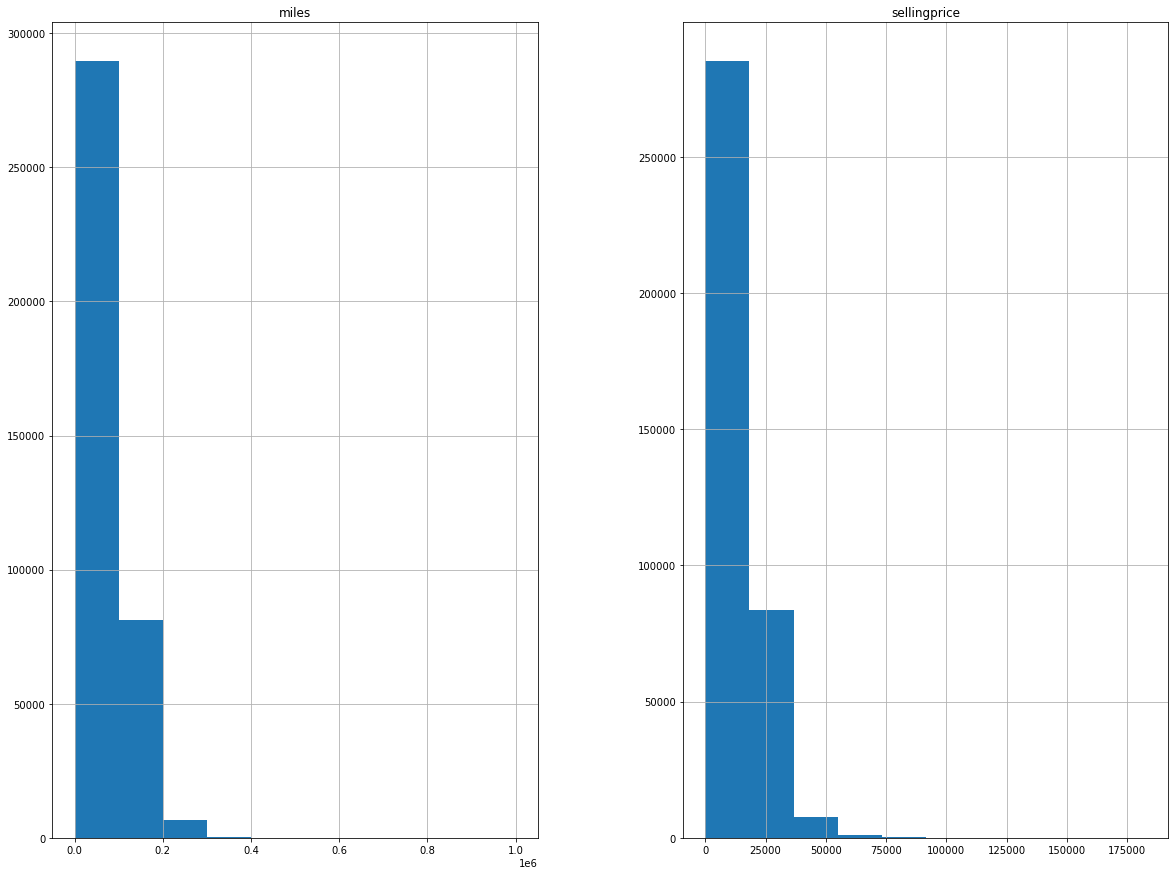

In [33]:
# histograms
df_train.hist(figsize=(20, 15));

# Relationships
## Correlation with response

Detect the relationship between each predictor and the response:


In [34]:
#sns.pairplot(data=df_train, y_vars=y_label, x_vars=features);

In [35]:
# pairplot with one categorical variable
#sns.pairplot(data=df_train, y_vars=y_label, x_vars=features);

                 miles  sellingprice
miles         1.000000     -0.577659
sellingprice -0.577659      1.000000


<AxesSubplot:>

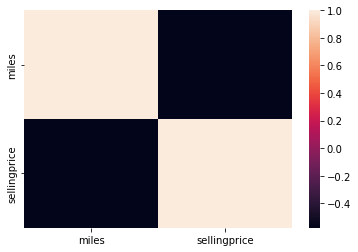

In [36]:
# inspect correlation
#corr = df_train.corr()
#corr_matrix[y_label].sort_values(ascending=False)

print(df_train.corr())
sns.heatmap(df_train.corr())


In [37]:
# Data exploration


sns.set_theme(style="ticks", color_codes=True)

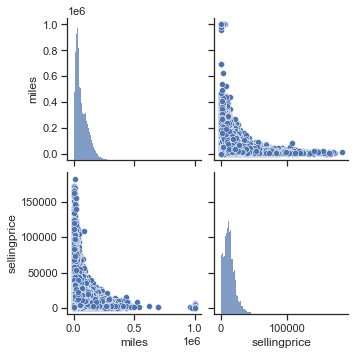

In [38]:
sns.pairplot(df_train);

<AxesSubplot:xlabel='miles', ylabel='Count'>

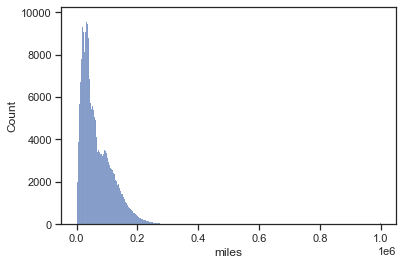

In [39]:
sns.histplot(data=df_train, x="miles")

In [40]:
# sns.histplot(data=df, x="ratingprice")

<AxesSubplot:xlabel='sellingprice', ylabel='Count'>

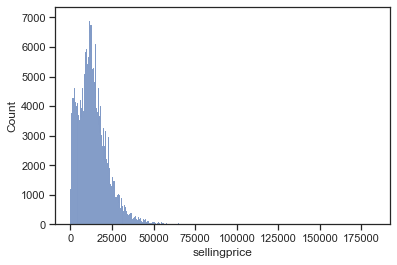

In [41]:
sns.histplot(data=df_train, x="sellingprice")

<AxesSubplot:xlabel='brand', ylabel='count'>

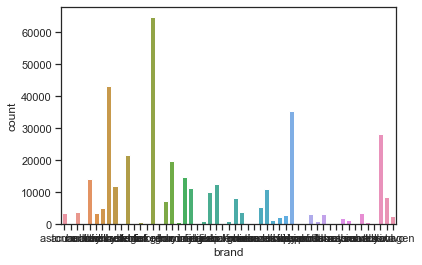

In [42]:
#Kategorisch

sns.countplot(x="brand", data=df_train)

<AxesSubplot:xlabel='year', ylabel='count'>

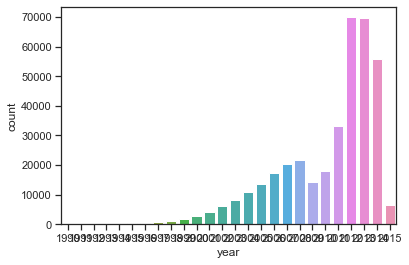

In [43]:
sns.countplot(x="year", data=df_train)

# Fehlende Daten

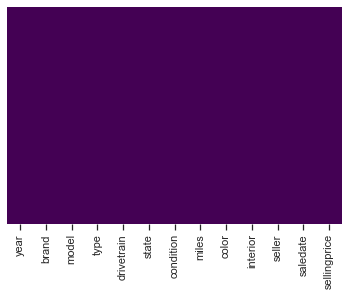

In [44]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [45]:
# absolute number of missing values
print(df_train.isnull().sum())

year            0
brand           0
model           0
type            0
drivetrain      0
state           0
condition       0
miles           0
color           0
interior        0
seller          0
saledate        0
sellingprice    0
dtype: int64


In [46]:
# percentage of missing values
print(df_train.isnull().sum() * 100 / len(df))

year            0.0
brand           0.0
model           0.0
type            0.0
drivetrain      0.0
state           0.0
condition       0.0
miles           0.0
color           0.0
interior        0.0
seller          0.0
saledate        0.0
sellingprice    0.0
dtype: float64


# Data Pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder


In [48]:
# build numeric pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
    ])

num_pipeline
    


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())])

In [49]:

# build categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
cat_pipeline


Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [50]:

# create full pipeline
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, feat_num),
        ('cat', cat_pipeline, feat_cat)])


full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['miles']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['year', 'brand', 'model', 'type',
                                  'drivetrain', 'state', 'condition', 'color',
                                  'interior', 'seller', 'saledate'])])

# Model
## Model Training

In [51]:
from sklearn.linear_model import LinearRegression


# Use pipeline with linear regression model
lm_pipe = Pipeline(steps=[
            ('full_pipeline', full_pipeline),
            ('lm', LinearRegression())
                         ])

In [52]:
from sklearn import set_config
# Show pipeline as diagram
set_config(display="diagram")

# Fit model
lm_pipe.fit(X_train, y_train)

# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

KeyboardInterrupt: 

# Model Evaluation

In [138]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# obtain predictions for training data
y_pred = lm_pipe.predict(X_train)

# R squared
r2_score(y_train, y_pred) 

# MSE
mean_squared_error(y_train, y_pred)

# RMSE
mean_squared_error(y_train, y_pred, squared=False)

# MAE
mean_absolute_error(y_train, y_pred)



2140.0031063445413

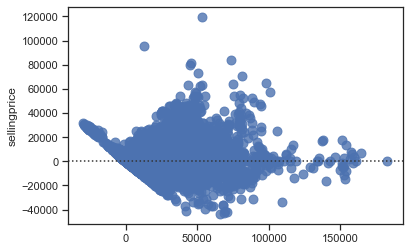

In [139]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

# Model Tuning

In [145]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("pca", PCA()), 
    ("logistic", LogisticRegression(max_iter=10000, tol=0.1))])

# Data
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}

# Gridsearch
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)

# Show results
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.924):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


# Evaluate best model

# Evaluate on test set

In [149]:
y_pred = lm_pipe.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))


MSE: 12413603.671531325
RMSE: 3523.294434408133
